### Import Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Load the Data

In [79]:
data_set_train = pd.read_csv('/Users/kyotun/Desktop/ML/stock-price/csv/Google_Stock_Price_Train.csv')
data_set_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [80]:
training_set = data_set_train.iloc[:,1:2]
training_set

,Open
0,325.25
1,331.27
2,329.83
3,328.34
4,322.04
...,...
1253,790.90
1254,790.68
1255,793.70
1256,783.33


### Feature Scaling 

In [81]:
#There is 2 feature scaling type
#Normalization
#Standardization
#We'll use Normalization for this example
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [82]:
scaled_train_set = scaler.fit_transform(training_set)
scaled_train_set

array([[8.581e-02],
       [9.701e-02],
       [9.433e-02],
       [9.156e-02],
       [7.984e-02],
       [6.433e-02],
       [5.854e-02],
       [6.569e-02],
       [6.109e-02],
       [6.639e-02],
       [6.143e-02],
       [7.475e-02],
       [2.798e-02],
       [2.379e-02],
       [2.409e-02],
       [1.592e-02],
       [1.079e-02],
       [9.673e-03],
       [1.643e-02],
       [2.100e-02],
       [2.281e-02],
       [2.273e-02],
       [2.811e-02],
       [3.213e-02],
       [4.338e-02],
       [4.476e-02],
       [4.790e-02],
       [4.407e-02],
       [4.649e-02],
       [4.746e-02],
       [4.874e-02],
       [3.936e-02],
       [4.137e-02],
       [4.035e-02],
       [4.785e-02],
       [4.325e-02],
       [4.357e-02],
       [4.286e-02],
       [4.602e-02],
       [5.398e-02],
       [5.739e-02],
       [5.715e-02],
       [5.570e-02],
       [4.422e-02],
       [4.515e-02],
       [4.606e-02],
       [4.413e-02],
       [3.676e-02],
       [4.487e-02],
       [5.065e-02],


### Create A Data Structure

In [83]:
X_train = []
y_train = []
size_of_box = 60
size_of_data = len(scaled_train_set)
np.set_printoptions(precision=3, threshold=np.inf)

In [84]:
for i in range(size_of_box, size_of_data):
    X_train.append(scaled_train_set[i-size_of_box:i,0])
    y_train.append(scaled_train_set[i,0])
#X_train contains first 60 days
#y_train contains the value of last day

In [85]:
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [86]:
#Use reshape to add new dimension
#New dimension = new indicator, therefore prediction could be optimized
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### Create the RNN

In [87]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [88]:
#We're predicting continuous data, therefore -> Regression
regressor = Sequential()
hidden_layer_size = 50

In [90]:
# Adding the first/initial layer
regressor.add(LSTM(hidden_layer_size, return_sequences = True, input_shape = (X_train.shape[1], 1)))

# %20 of the neurons of the LSTM layer will be ignored 
# during the training in forward and back propagation
regressor.add(Dropout(0.2))

In [91]:
# Adding more layer
# don't need to specify input_shape anymore
# cause it's already prespecified in first hidden layer
regressor.add(LSTM(hidden_layer_size, return_sequences = True))
regressor.add(Dropout(0.2))

In [92]:
regressor.add(LSTM(hidden_layer_size, return_sequences = True))
regressor.add(Dropout(0.2))

In [93]:
#After this layer comes the output layer, so we don't have any return_sequence
regressor.add(LSTM(hidden_layer_size, return_sequences = False))
regressor.add(Dropout(0.2))

In [94]:
#Output_layer -> Stock price
regressor.add(Dense(units=1))

In [95]:
#Compile the RNN, optimizer and loss func.
#Adam or RMSprop
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

### Fit the Train set to RNN

In [97]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0042
Epoch 2/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0043
Epoch 3/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0035
Epoch 4/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0038
Epoch 5/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0038
Epoch 7/100
38/38 [==============================] - 3s 70ms/step - loss: 0.0037
Epoch 8/100
38/38 [==============================] - 3s 71ms/step - loss: 0.0034
Epoch 9/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0033
Epoch 10/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0040
Epoch 11/100
38/38 [==============================] - 3s 76ms/step - loss: 0.0029
Epoch 12/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0032
Epoch 13/100
38/38 [=====

### Get the Test Data

In [135]:
data_set_test = pd.read_csv('/Users/kyotun/Desktop/ML/stock-price/csv/Google_Stock_Price_Test.csv')
data_set_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [136]:
real_stock_price = data_set_test.iloc[:, 1:2].values
real_stock_price
#never scale the test(real) values

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Prepare the Data for Predictions

In [137]:
#concatination of training and test set, but we have to be careful
#we will scale the concatenation version, but we need to keep same the actual test values
#we will scale just the inputs not the actual test values

dataset_total = pd.concat((data_set_train['Open'], data_set_test['Open']), axis = 0) #train + test
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [138]:
inputs = dataset_total[len(dataset_total) - len(data_set_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [139]:
inputs = inputs.reshape(-1,1) # make the inputs 3D

In [140]:
inputs = scaler.transform(inputs) # scale the inputs

/Users/kyotun/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [141]:
X_test = []
lower_end = size_of_box
higher_end = size_of_box + len(data_set_test)

In [142]:

for i in range(lower_end, higher_end):
    X_test.append(inputs[i-lower_end:i, 0]) #from 0 to inclusive 59, 

In [143]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [144]:
predicted_stock_price = regressor.predict(X_test) # regressor model predict the outputs based on inputs 0-59, 1-60, 2-61, ...
predicted_stock_price = scaler.inverse_transform(predicted_stock_price) # inversing the transformed values to see real values

1/1 [==============================] - 0s 25ms/step


### Visualize the Results

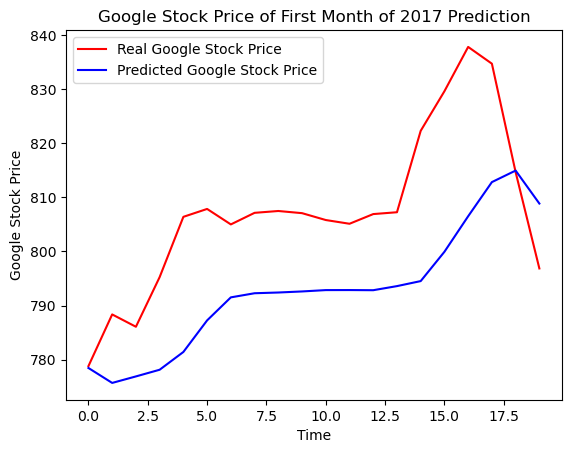

In [146]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price of First Month of 2017 Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
#Our model lagging behind the actual values, cause it cannot react too fast nonlinear changes
#future variation of the stock price are independent from the past,(macro-micro economics)
#our model reacts okay to smooth changes

